# Preamble

In [15]:
import pandas as pd
import plotly.graph_objects as go
from plotly_resampler import FigureResampler, FigureWidgetResampler
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import os

In [16]:
dirname = os.getcwd()
filename = dirname + "/data/pump_station_data.parquet"
print(filename)

/home/smrobot/Industrial-IoT-For-Digitization-Of-Electronic-Assets-Course/Final Project/data/pump_station_data.parquet


In [17]:
pump_station_data = pd.read_parquet(filename)
pump_station_data.head(5)

,height,outflow,pump1_rpm,pump1_power,pump4_rpm,pump4_power
time,,,,,,
2023-01-16 00:00:00.970000+00:00,167.0,533.0,1260.0,57.54,0.0,0.0
2023-01-16 00:00:01.969000+00:00,167.0,534.0,1260.0,55.40,0.0,0.0
2023-01-16 00:00:02.969000+00:00,167.0,527.0,1260.0,58.09,0.0,0.0
2023-01-16 00:00:03.969000+00:00,167.0,521.0,1260.0,58.71,0.0,0.0
2023-01-16 00:00:04.969000+00:00,167.0,521.0,1260.0,54.62,0.0,0.0


# Outflow over speed for Pump 1

In [18]:
pump_station_data = pump_station_data[(pump_station_data["pump1_rpm"] > 0) & (pump_station_data["pump4_rpm"] == 0)]
train = pump_station_data.loc["2023-01-27":"2023-01-30"]
test = pump_station_data.loc["2023-02-27":"2023-03-02"] 

x_train = train["pump1_rpm"].values.reshape(-1,1)
y_train = train["outflow"].values.reshape(-1,1)
x_test = test["pump1_rpm"].values.reshape(-1,1)
y_test = test["outflow"].values.reshape(-1,1)

mask = y_test >= 0.9*x_test-680
filtered_x = x_test[mask]
filtered_y = y_test[mask]

coefficients = np.polyfit(filtered_x, filtered_y, 1)

fit_curve = np.poly1d(coefficients)
x_series = np.arange(0, 1300, 1)
y_fit = coefficients[0]*x_series+coefficients[1]


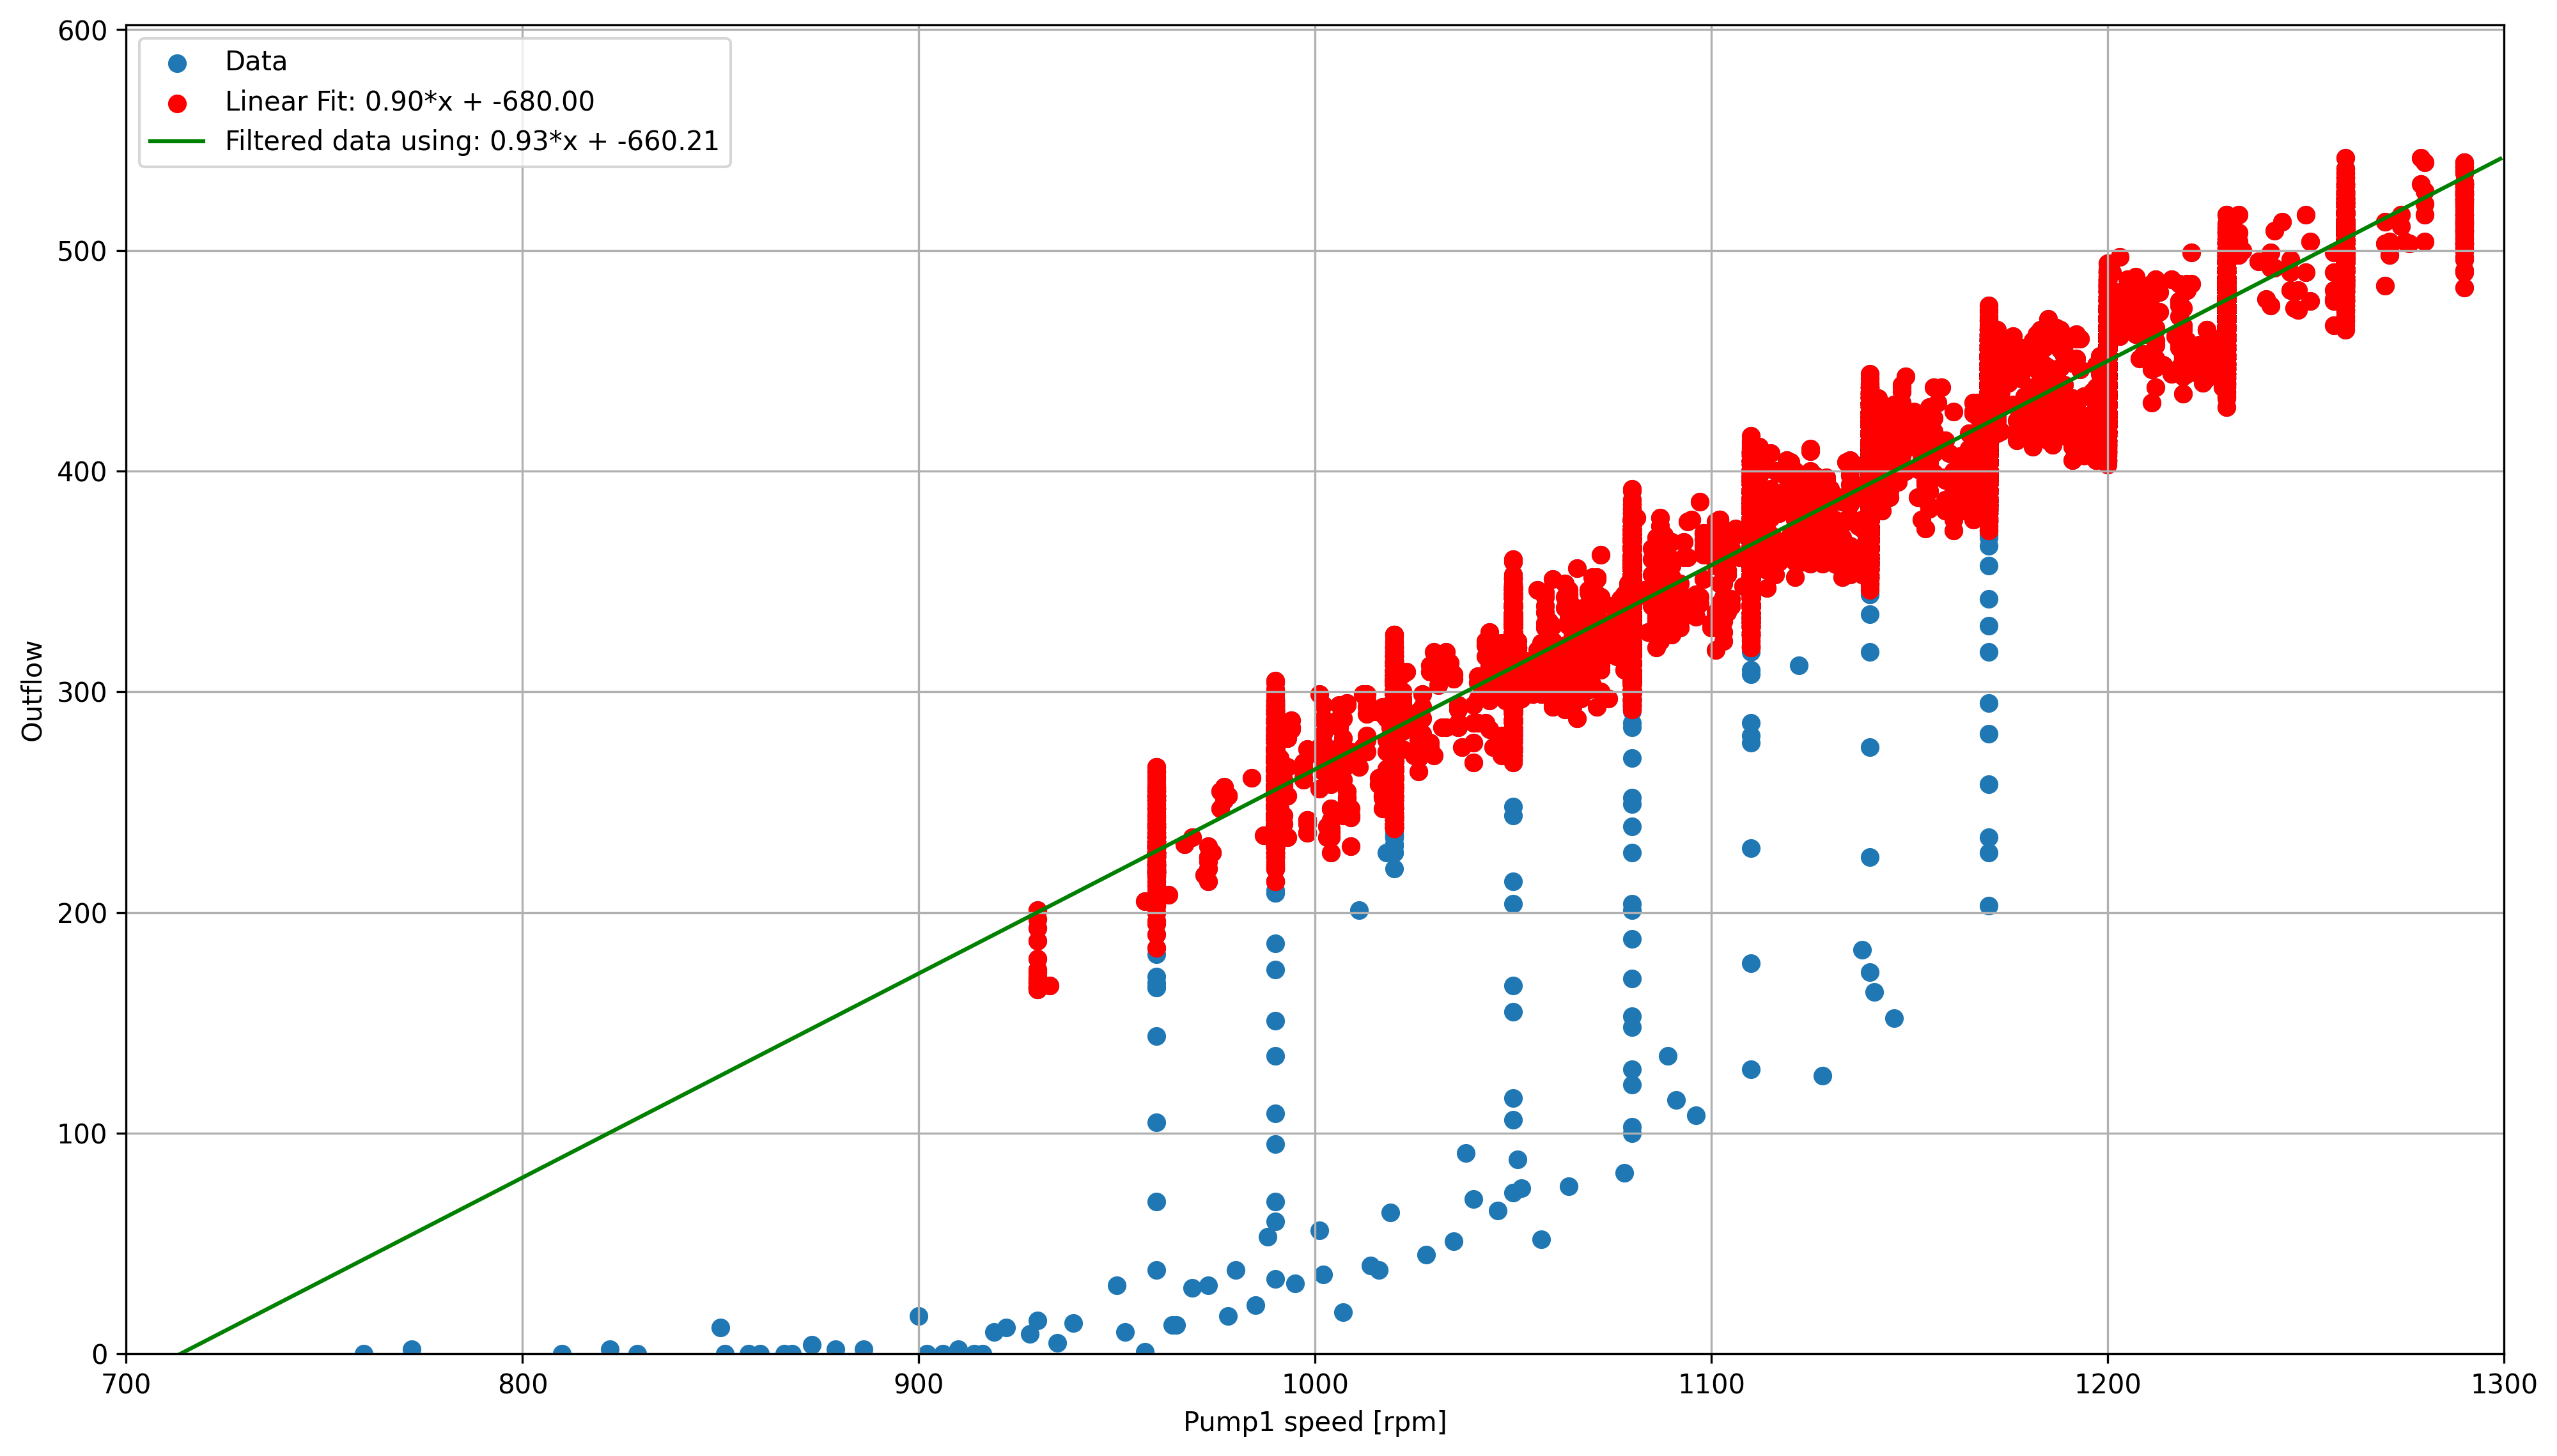

In [19]:
plt.figure(3, dpi=300, figsize=(16,9))
plt.scatter(y=y_test, x=x_test, label="Data")
plt.scatter(y=filtered_y, x=filtered_x, color="red", label=f'Linear Fit: {0.9:.2f}*x + {-680:.2f}')
plt.plot(y_fit, color="g", label=f'Filtered data using: {coefficients[0]:.2f}*x + {coefficients[1]:.2f}')
plt.legend()
plt.xlim(700, 1300)
plt.ylim(0)
plt.ylabel("Outflow")
plt.xlabel("Pump1 speed [rpm]")
plt.grid(True)

# Outflow over speed for Pump 4

In [20]:
pump_station_data = pump_station_data[(pump_station_data["pump1_rpm"] == 0) & (pump_station_data["pump4_rpm"] > 0)]
train = pump_station_data.loc["2023-01-27":"2023-01-30"]
test = pump_station_data.loc["2023-02-27":"2023-03-02"] 

x_train = train["pump4_rpm"].values.reshape(-1,1)
y_train = train["outflow"].values.reshape(-1,1)
x_test = test["pump4_rpm"].values.reshape(-1,1)
y_test = test["outflow"].values.reshape(-1,1)

In [22]:
mask = y_test >= 1.17*x_test-800
filtered_x = x_test[mask]
filtered_y = y_test[mask]



#mask = y_test >= 1.17*x_test-800 
#filtered_x_temp = x_test[mask]
#filtered_y_temp = y_test[mask]
#filtered_x_temp = filtered_x_temp.reshape(-1,1)
#filtered_y_temp = filtered_y_temp.reshape(-1,1)

#mask =  filtered_x_temp >=700

#filtered_x = filtered_x_temp[mask]
#filtered_y = filtered_y_temp[mask]

coefficients = np.polyfit(filtered_x, filtered_y, 1)

fit_curve = np.poly1d(coefficients)
x_series = np.arange(0, 1300, 1)
y_fit = coefficients[0]*x_series+coefficients[1]

TypeError: expected non-empty vector for x